# TEXT ANALYTICS GROUP ASSIGNMENT #2

#### Group Members: Brooks Beckelman, Zack Bilderback, Dallas Griffin, Estevan Gonzalez, Sean Kessel, Davis Townsend

In [1]:
import pandas as pd
from pandas import Series, DataFrame
%pylab inline

import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [2]:
yelp = pd.read_csv('YelpData.csv')

In [3]:
# Convert rating to high (4,5) or low (1,2,3)
yelp['rating'] = np.where(yelp['stars'] >= 4, 'high','low')
yelp.head(3)

,stars,votes_cool,votes_funny,votes_useful,Cheap,Moderate,Expensive,VeryExpensive,American,Chinese,...,Indian,Italian,Greek,Mediterranean,Mexican,Thai,Vietnamese,Others,Review,rating
0,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,This location is out of business. I drove by i...,low
1,2,2,2,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,= = = = = = CLOSED = = = = = =This JB s locati...,low
2,4,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,This is just a basic (albeit mini) chain greas...,high


## Task A: Numeric Data Only

In [4]:
from sklearn.cross_validation import train_test_split

# Split data into train and test sets
train, test = train_test_split(yelp, test_size=0.25, random_state=123)

x_train = train.drop(['stars', 'Review', 'rating'], axis=1)
y_train = train['rating']

x_test = test.drop(['stars', 'Review', 'rating'], axis=1)
y_test = test['rating']

### Logistic Regression

In [47]:
import sklearn
from sklearn import linear_model

logreg = linear_model.LogisticRegression()
logreg_classifier = logreg.fit(x_train, y_train)
logreg_predict = logreg.predict(x_test)
logreg_testAccuracy = logreg.score(x_test, y_test)

In [58]:
from sklearn import metrics

print 'LOGISTIC REGRESSION: '
print 'Precision:' + str(metrics.precision_score(y_test, logreg_predict, average = 'binary', pos_label='high'))
print 'Recall: ' + str(metrics.recall_score(y_test, logreg_predict, average = 'binary', pos_label='high'))
print 'Accuracy: ' + str(metrics.accuracy_score(y_test, logreg_predict))

LOGISTIC REGRESSION: 
Precision:0.689127738735
Recall: 0.978286384977
Accuracy: 0.6844


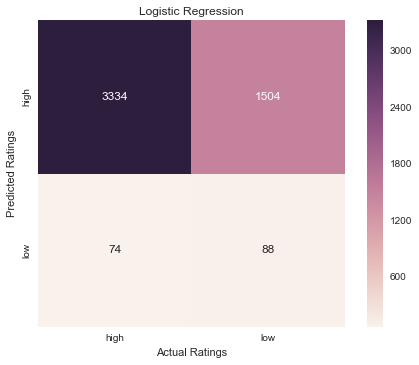

In [22]:
#Fancy boy confusion matrix
mat = metrics.confusion_matrix(y_test, logreg_predict)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True, 
            xticklabels=unique(y_test), yticklabels=unique(logreg_predict))
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Logistic Regression')

### KNN

In [7]:
from sklearn.neighbors import KNeighborsClassifier

k_range = range(1,101)
accuracies = []
for k in k_range:
    if k % 10 == 0:
        print 'Performing classifier', k
    knn = KNeighborsClassifier(n_neighbors=k)
    knn_classifier = knn.fit(x_train, y_train)
    knn_accuracy = knn.score(x_test, y_test)
    accuracies.append(knn_accuracy)


Performing classifier 10
Performing classifier 20
Performing classifier 30
Performing classifier 40
Performing classifier 50
Performing classifier 60
Performing classifier 70
Performing classifier 80
Performing classifier 90
Performing classifier 100


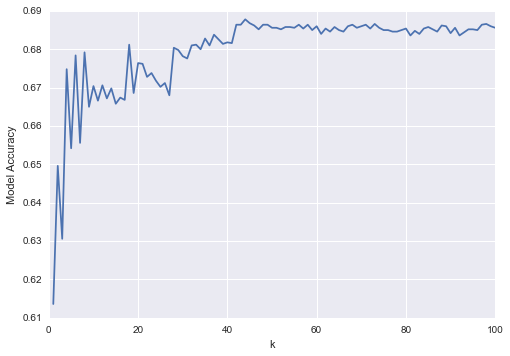

In [8]:
plot(k_range, accuracies)
xlabel('k')
ylabel('Model Accuracy')

In [49]:
s_accuracies = Series(accuracies)

k = s_accuracies.idxmax() + 1
knn = KNeighborsClassifier(n_neighbors=k)
knn_classifier = knn.fit(x_train, y_train)
knn_predict = knn.predict(x_test)
knn_accuracy = knn.score(x_test, y_test)

In [57]:
print 'K-NEAREST NEIGHBORS:'
print 'Precision:' + str(metrics.precision_score(y_test, knn_predict, average = 'binary', pos_label='high'))
print 'Recall: ' + str(metrics.recall_score(y_test, knn_predict, average = 'binary', pos_label='high'))
print 'Accuracy: ' + str(metrics.accuracy_score(y_test, knn_predict))

K-NEAREST NEIGHBORS:
Precision:0.692998955068
Recall: 0.973004694836
Accuracy: 0.6878


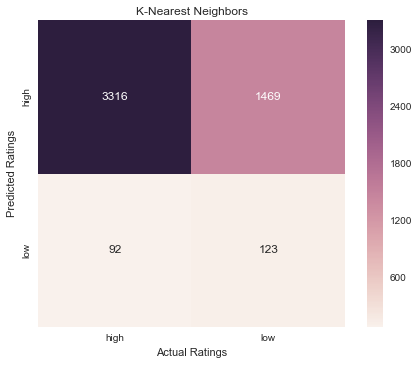

In [24]:
#Fancy boy confusion matrix
mat = metrics.confusion_matrix(y_test, knn_predict)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True, 
            xticklabels=unique(y_test), yticklabels=unique(knn_predict))
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('K-Nearest Neighbors')

## Naive Bayes

In [51]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()
bnb_classifier = bnb.fit(x_train, y_train)
bnb_predict = bnb.predict(x_test)
bnb_accuracy = bnb.score(x_test, y_test)

In [54]:
print 'BERNOULLI NAIVE BAYES:'
print 'Precision:' + str(metrics.precision_score(y_test, bnb_predict, average = 'binary', pos_label='high'))
print 'Recall: ' + str(metrics.recall_score(y_test, bnb_predict, average = 'binary', pos_label='high'))
print 'Accuracy: ' + str(metrics.accuracy_score(y_test, bnb_predict))

BERNOULLI NAIVE BAYES:
Precision:0.6816
Recall: 1.0
Accuracy: 0.6816


C:\Users\brook\Anaconda2\lib\site-packages\seaborn\matrix.py:151: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if yticklabels == []:


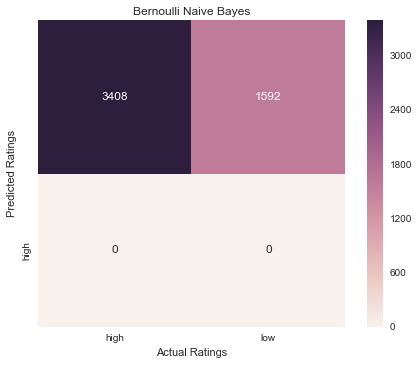

In [25]:
#Fancy boy confusion matrix
mat = metrics.confusion_matrix(y_test, bnb_predict)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True, 
            xticklabels=unique(y_test), yticklabels=unique(bnb_predict))
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Bernoulli Naive Bayes')

In [56]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb_classifier = mnb.fit(x_train, y_train)
mnb_predict = mnb.predict(x_test)
mnb_accuracy = mnb.score(x_test, y_test)

In [55]:
print 'MULTINOMIAL NAIVE BAYES:'
print 'Precision:' + str(metrics.precision_score(y_test, mnb_predict, average = 'binary', pos_label='high'))
print 'Recall: ' + str(metrics.recall_score(y_test, mnb_predict, average = 'binary', pos_label='high'))
print 'Accuracy: ' + str(metrics.accuracy_score(y_test, mnb_predict))

MULTINOMIAL NAIVE BAYES:
Precision:0.682055399438
Recall: 0.9970657277
Accuracy: 0.6812


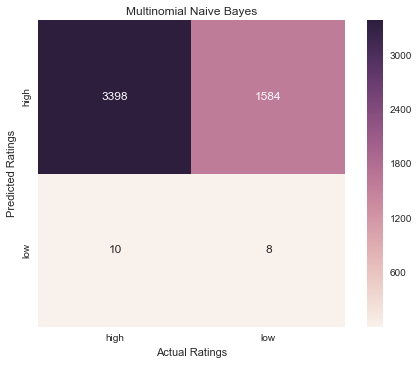

In [26]:
#Fancy boy confusion matrix
mat = metrics.confusion_matrix(y_test, mnb_predict)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True, 
            xticklabels=unique(y_test), yticklabels=unique(mnb_predict))
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Multinomial Naive Bayes')

## Task B: Reviews (Text Data) Only

In [72]:
sample = yelp.sample(10000, random_state=321)

# Split sample into train and test sets
trainB, testB = train_test_split(sample, test_size=0.25, random_state=123)

x_trainB = trainB['Review']
y_trainB = trainB['rating']

x_testB = testB['Review']
y_testB = testB['rating']

In [73]:
from sklearn.feature_extraction.text import CountVectorizer

# Create matrix of token counts from reviews
vectorizer = CountVectorizer(analyzer = "word", tokenizer= None, preprocessor = None, 
                             stop_words = 'english', max_features = None, ngram_range=(1, 2))

x_trainB = vectorizer.fit_transform(x_trainB)
x_testB = vectorizer.transform(x_testB)

In [74]:
# Run Naive Bayes Classifier
mnb_classifierB = MultinomialNB().fit(x_trainB, y_trainB)

mnb_predictB = mnb_classifierB.predict(x_testB)

In [75]:
print 'Precision:' + str(metrics.precision_score(y_testB, mnb_predictB, average = 'binary', pos_label='high'))
print 'Recall: ' + str(metrics.recall_score(y_testB, mnb_predictB, average = 'binary', pos_label='high'))
print 'Accuracy: ' + str(metrics.accuracy_score(y_testB, mnb_predictB))

Precision:0.767640449438
Recall: 0.990144927536
Accuracy: 0.7864


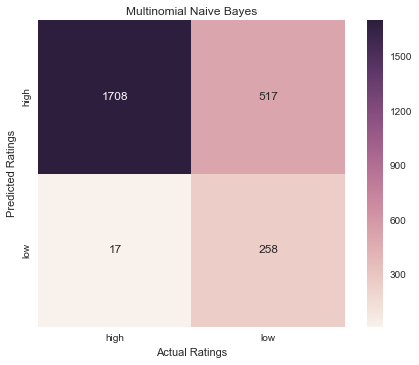

In [76]:
#Fancy boy confusion matrix
mat = metrics.confusion_matrix(y_testB, mnb_predictB)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True, 
            xticklabels=unique(y_test), yticklabels=unique(mnb_predictB))
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Multinomial Naive Bayes')

## Task C: Numeric and Text Data

In [71]:
x_trainC = trainB.drop(['stars', 'rating'], axis=1)
y_trainC = trainB['rating']

x_testC = testB.drop(['stars', 'rating'], axis=1)
y_testC = testB['rating']